<a href="https://colab.research.google.com/github/Supansapkb/bsc_dpdm22/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [217]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
data_test = pd.read_csv('/content/drive/MyDrive/bsc_dpdm22/Test.csv')
print(data_test.shape) # shown nomber of (row, column)
data_test.head()

(2627, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [220]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [221]:
print(len(data_test[data_test['Graduated'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Graduated'])

24


In [222]:
print(len(data_test[data_test['Profession'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Profession'])

37


In [223]:
print(len(data_test[data_test['Ever_Married'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Ever_Married'])

47


In [224]:
print(len(data_test[data_test['Work_Experience'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Work_Experience'])

253


In [225]:
print(len(data_test[data_test['Family_Size'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Family_Size'])

88


In [226]:
#fill NA with Text 
data_test['Graduated'] = data_test['Graduated'].fillna('Unknown') #จบการศึกษาfillnaว่าunknown 
data_test['Profession'] = data_test['Profession'].fillna('Unknown') #อาชีพ

In [227]:
# fill NA with 0,1
data_test[['Work_Experience']]  = data_test[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_test[['Family_Size']]  = data_test[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [228]:
del data_test['Var_1']

In [229]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

In [230]:
data_train = pd.read_csv('/content/drive/MyDrive/bsc_dpdm22/Train.csv')
print(data_train.shape) # shown nomber of (row, column)
data_train.head(3)

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [231]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [232]:
print(len(data_train[data_train['Ever_Married'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Ever_Married'])

140


In [233]:
print(len(data_train[data_train['Graduated'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Graduated'])

74


In [234]:
print(len(data_train[data_train['Profession'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Profession'])

113


In [235]:
print(len(data_train[data_train['Work_Experience'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Work_Experience'])

772


In [236]:
print(len(data_train[data_train['Family_Size'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Family_Size'])

251


In [237]:
del data_train['Var_1']

In [238]:
#fill NA with Text 
data_train['Graduated'] = data_train['Graduated'].fillna('Unknown')  #จบการศึกษาfillnaว่าunknown 
data_train['Ever_Married'] = data_train['Ever_Married'].fillna('Unknown') #สถานภาพการสมรส
data_train['Profession'] = data_train['Profession'].fillna('Unknown') #อาชีพ
# fill NA with 0,1
data_train[['Work_Experience']]  = data_train[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_train[['Family_Size']]  = data_train[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [239]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

## Naive beys


In [270]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


In [276]:
# Load the data
data = data_test

In [277]:
print(data.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')


In [278]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load the data
data = data_test

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(data.drop('Segmentation', axis=1), drop_first=True)
y = data['Segmentation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naive Bayes model and fit it to the training set
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           A       0.33      0.28      0.30       211
           B       0.26      0.08      0.12       153
           C       0.23      0.44      0.31       117
           D       0.34      0.40      0.37       173

    accuracy                           0.30       654
   macro avg       0.29      0.30      0.27       654
weighted avg       0.30      0.30      0.28       654

Accuracy: 0.29510703363914376


In [280]:
#Defining Xs and y

X = auto_ds[["Age", "Family_Size", "Profession_Healthcare", "Profession_Entertainment", "Profession_Artist", "Ever_Married_Yes",
             "Graduated_No", "Spending_Score_Level"]]
y = auto_ds["Segmentation_Level"]
y_dl = Segmentation_encoding_dl #for the DL model

#Scaling all features

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

#Setting train/test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_scaled, y_dl, random_state=0) #for the DL model

NameError: ignored

Train: Accuracy:0.354, Precision:0.340, Recall:0.354, F1:0.315
Test : Accuracy:0.315, Precision:0.330, Recall:0.315, F1:0.279

Confusion matrix:
Predicted   A  B   C    D
Actual                   
A          50  4  54  103
B          37  6  62   48
C          38  4  49   26
D          14  4  54  101, 



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


ValueError: ignored

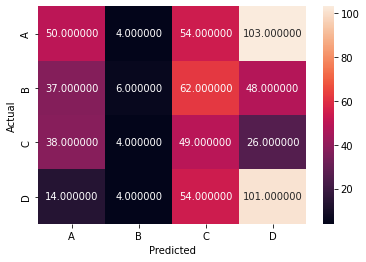

In [279]:
#Creating a Naive Bayes model and checking its Metrics

from sklearn import naive_bayes

#Fitting to the model
model_nb = naive_bayes.MultinomialNB().fit(X_train, y_train)

#Getting the predictions & Metrics
y_preds_train = model_nb.predict(X_train)
y_preds_test = model_nb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Train: Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_train, precision_train, recall_train, f1_train))
print("Test : Accuracy:{0:,.3f}, Precision:{1:,.3f}, Recall:{2:,.3f}, F1:{3:,.3f}".format(accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

#Visualizing y_pred in the dataset
y_preds_all = model_nb.predict(X_scaled)
auto_ds["Segmentation_Level_predicted"] = y_preds_all
auto_ds.to_excel("model_nb.xlsx")

# K-Mean

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [247]:
df_train = data_train

In [248]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C


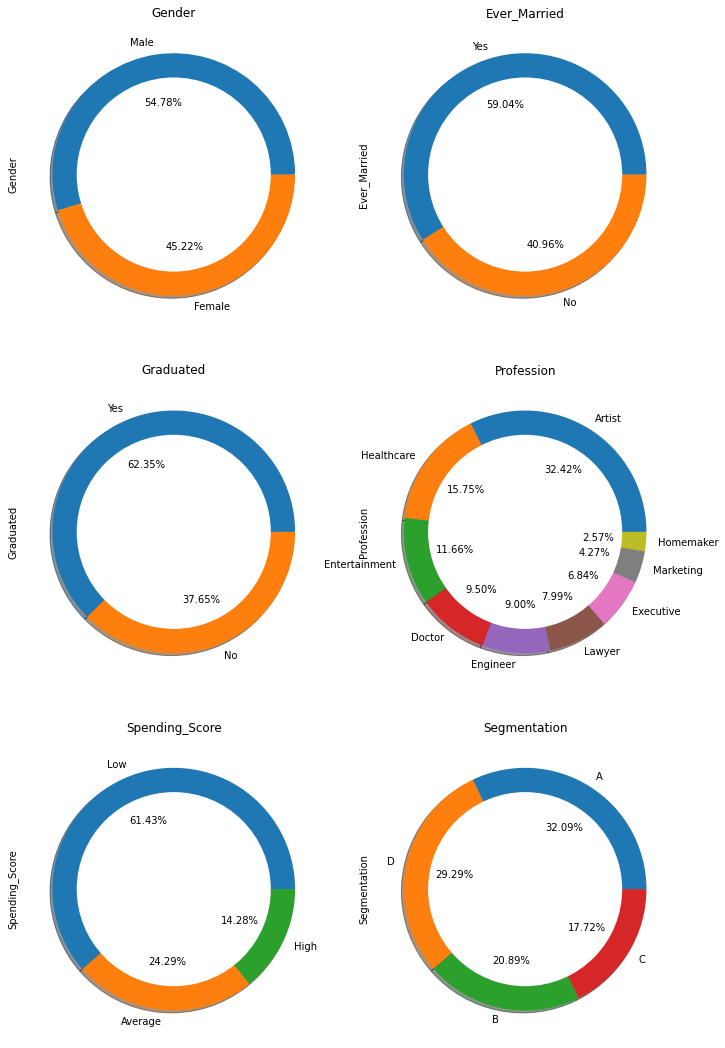

In [267]:
cat_vars = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(10,20))

for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    data[var].value_counts().plot(kind='pie',autopct='%.2f%%',shadow = True)
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var)


plt.tight_layout()
plt.show()

In [249]:
# How many is in each category
if 'cnt_IDS' not in df_train.columns:
    cd = df_train.groupby(['Segmentation'])['ID'].count().reset_index()
    cd['cnt_IDS'] = cd['ID']
    del cd['ID']
    df_train = df_train.merge(cd, on='Segmentation', how='left')

In [250]:
# Drop the 'Segmentation' column from the data
df_train_kmeans = df_train.drop(['Segmentation', 'ID'], axis=1)


In [251]:
df_train_kmeans.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cnt_IDS
0,Male,No,22,No,Healthcare,1.0,Low,4.0,1772
1,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1583
2,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1583
3,Male,Yes,56,No,Artist,0.0,Average,2.0,1735
4,Male,No,32,Yes,Healthcare,1.0,Low,3.0,1735


In [252]:
# Convert the categorical columns to Label encoded columns
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()
df_train_kmeans['Gender'] = encoder.fit_transform(df_train_kmeans['Gender'])
df_train_kmeans['Ever_Married'] = encoder.fit_transform(df_train_kmeans['Ever_Married'])
df_train_kmeans['Graduated'] = encoder.fit_transform(df_train_kmeans['Graduated'])
df_train_kmeans['Profession'] = encoder.fit_transform(df_train_kmeans['Profession'])
df_train_kmeans['Spending_Score'] = encoder.fit_transform(df_train_kmeans['Spending_Score'])

In [253]:
# Impute missing values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_train_kmeans_imputed = imputer.fit_transform(df_train_kmeans)

# Scale the data using the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_kmeans_imputed = scaler.fit_transform(df_train_kmeans_imputed)

In [262]:
# To delete the warning message
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Elbow method to find the best number of clusters
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_train_kmeans_imputed)
    Sum_of_squared_distances.append(km.inertia_)
    print("For k =", k, ", the inertia is", km.inertia_)    

For k = 1 , the inertia is 60461.99999999991
For k = 2 , the inertia is 47852.740224489746
For k = 3 , the inertia is 42413.76677519713
For k = 4 , the inertia is 37707.70026604179
For k = 5 , the inertia is 35028.53574417769
For k = 6 , the inertia is 32925.42692788076
For k = 7 , the inertia is 31189.266163045653
For k = 8 , the inertia is 29724.23664034075
For k = 9 , the inertia is 28332.290101938903
For k = 10 , the inertia is 27321.10108850966
For k = 11 , the inertia is 26470.457860988958
For k = 12 , the inertia is 25582.424045704673
For k = 13 , the inertia is 24713.68451805805
For k = 14 , the inertia is 24041.339434455796


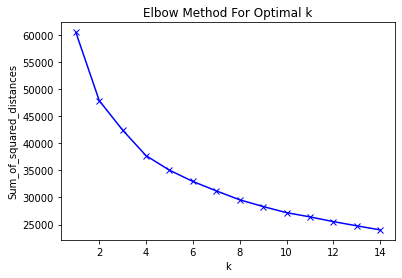

In [255]:
# Plot the Elbow method
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [256]:
#Determine the best number of clusters using the elbow method
best_k = 4

#Train the KMeans model using the best number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(df_train_kmeans_imputed)

KMeans(n_clusters=4)

In [257]:
# Predict the cluster labels
labels = kmeans.predict(df_train_kmeans_imputed)

# Count the number of customers in each cluster
from collections import Counter
counts = Counter(labels)

# Get the target categories 'A', 'B', 'C', and 'D' in the 'Segmentation' column
target_categories = df_train['Segmentation']

# Find the target category that is most frequent in each cluster
cluster_categories = {}
for label, count in counts.items():
    cluster_data = target_categories[labels == label]
    most_frequent_category = cluster_data.value_counts().idxmax()
    cluster_categories[label] = most_frequent_category

# Map the predicted labels to target categories
mapped_labels = [cluster_categories[label] for label in labels]

# Append a column 'n_Clusters' to the dataframe with the mapped labels
df_train['new_Segmentation'] = mapped_labels


df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,cnt_IDS,new_Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1772,D
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,1583,A
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,1583,A
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C,1735,C
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C,1735,D
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,B,1583,C
6714,464685,Male,No,35,No,Executive,3.0,Low,4.0,D,1772,D
6715,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D,1772,A
6716,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B,1583,A


In [261]:
# Calculate the number of correct predictions
correct_predictions = sum(df_train['Segmentation'] == df_train['new_Segmentation'])

# Calculate the total number of predictions
total_predictions = df_train.shape[0]

# Calculate the accuracy as a percentage
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy for K-Means: {:.2f}%".format(accuracy))

Accuracy for K-Means: 49.23%
